# Introducción

Vamos a repasar algunas de las manipulaciones que podemos hacer con un dataset

## Preparacion

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

Download the csv file containing the heart dataset.

In [2]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/applied-dl/heart.csv')

Read the csv file using pandas.

In [3]:
df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


Preparamos el dataset. Sacamos la etiqueta:

In [4]:
target = df.pop('target')

In [5]:
df.values,df.shape

(array([[63, 1, 1, ..., 3, 0, 'fixed'],
        [67, 1, 4, ..., 2, 3, 'normal'],
        [67, 1, 4, ..., 2, 2, 'reversible'],
        ...,
        [65, 1, 4, ..., 2, 1, 'reversible'],
        [48, 1, 4, ..., 1, 2, 'reversible'],
        [63, 0, 4, ..., 2, 3, 'reversible']], dtype=object),
 (303, 13))

Convierte a one/shot la columna que es categorica

In [6]:
df['thal'] = pd.Categorical(df['thal'])
df['thal'] = df.thal.cat.codes

In [7]:
df.thal.head()

0    2
1    3
2    4
3    3
4    3
Name: thal, dtype: int8

# Crear Datasets desde distintas fuentes

Veamos como podemos crear datasets desde diferentes fuentes:

- Pandas. Utilizando los contenidos de un Pandas Dataframe
- Contenido de Archivos. Utilizando los contenidos de archivos
- Filesystem. Utilizando El contenido de un directorio - nombre de archivos
- Numpy

In [8]:
dataset = tf.data.Dataset.from_tensor_slices(df.values)
list(dataset.take(2).as_numpy_iterator())

[array([ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
          2.3,   3. ,   0. ,   2. ]),
 array([ 67. ,   1. ,   4. , 160. , 286. ,   0. ,   2. , 108. ,   1. ,
          1.5,   2. ,   3. ,   3. ])]

In [9]:
datasetT = tf.data.TextLineDataset(["./titanic/gender_submission.csv", "UsarPandasKeras.md"]) 
list(datasetT.take(4).as_numpy_iterator())

[b'PassengerId,Survived', b'892,0', b'893,1', b'894,0']

In [10]:
datasetF = tf.data.Dataset.list_files("./*.ipynb")
list(datasetF.as_numpy_iterator())

[b'.\\titanic\\data-analysis-and-feature-extraction-with-python.ipynb',
 b'.\\pandas_dataframe.ipynb',
 b'.\\.ipynb_checkpoints\\datasetframing-checkpoint.ipynb',
 b'.\\pandas-basics\\basics.ipynb',
 b'.\\datasetframing.ipynb',
 b'.\\pandas-basics\\ejercicios.ipynb',
 b'.\\csv.ipynb',
 b'.\\data.ipynb']

In [11]:
datasetR = tf.data.Dataset.range(100)

## Vectores, Matrices y Duplas

Cuando se procesa una fuente de datos se elimina una de las dimensiones del dato. Si estamos tratando con vectores - numpy -, lo que procesaremos será escalares; Si estamos procesando matrices, esto es, un rango dos, cada elemento del dataset pasara a ser un vector.

Observemos como al procesar un vector, los argumentos del lambda son escalares:

In [12]:
datasetN1 = tf.data.Dataset.from_tensor_slices([1.1, 2, 3, 10.1, 20, 30, 100.1, 200, 300])

datasetN1 = datasetN1.map(lambda x: x*2) 
list(datasetN1.take(2).as_numpy_iterator())

[2.2, 4.0]

So lo que procesamos es una matriz, el argumento del lambda será cada una de las filas de la matriz, esto es, un vector:

In [13]:
datasetN2 = tf.data.Dataset.from_tensor_slices([[1.1, 2, 3],[10.1, 20, 30],[100.1, 200, 300]])

datasetN2 = datasetN2.map(lambda x: x*2)
list(datasetN2.take(2).as_numpy_iterator()) 

[array([2.2, 4. , 6. ], dtype=float32),
 array([20.2, 40. , 60. ], dtype=float32)]

El siguiente caso es bastante __interesante__. Vamos a ver como en este caso tenemos una tripla. El __lambda recibira tres argumentos, uno por cada elemento de la tripla__. Como los elementos de la tripla son un vector, lo que tendremos en cada argumento será un escalar:

In [14]:
datasetN3 = tf.data.Dataset.from_tensor_slices(([1.1, 2, 3],[10, 20, 30],[100, 200, 300]))

In [15]:
list(datasetN3.take(2).as_numpy_iterator())

[(1.1, 10, 100), (2.0, 20, 200)]

Vemos como cada elemento del dataset es una tripla, y cada elemento de la tripla un escalar. Fijemonos como la tripla esta construida con el primer escalar de cada tripla del dataset:

Vamos a incidir en este tema. Creamos este lambda para procesar el data set. __Hay que destacar como el lambda tiene tres argumentos__, como cada argumento __es un escalar__, y como podemos en la respuesta del lambda hacer una transformación. En nuestro caso vamos a crear una dupla:

In [16]:
def transforma(x,y,z):
    #devuelve una dupla
    return (x+1,y+z+2)
    #devuelve una tripla
    #return (x+1,y+1,z+1)

In [17]:
datasetN3 = datasetN3.map(lambda x,y,z: transforma(x,y,z))

list(datasetN3.take(2).as_numpy_iterator())

[(2.1, 112), (3.0, 222)]

## from_generator

Nos permite crear un dataset a partir de un iterator

In [18]:
import itertools 
 
def gen(): 
  for i in itertools.count(1): 
    yield (i, [1] * i) 
 
datasetGen = tf.data.Dataset.from_generator( 
     gen, 
     (tf.int64, tf.int64), 
     (tf.TensorShape([]), tf.TensorShape([None]))) 
 
list(datasetGen.take(3).as_numpy_iterator()) 

[(1, array([1], dtype=int64)),
 (2, array([1, 1], dtype=int64)),
 (3, array([1, 1, 1], dtype=int64))]

# repeat y batch

Con batch definimos el tamaño de cada elemento del dataset, cuantos datos de la fuente serán enpaquetados juntos. Con repeat indicamos el número de veces que vamos a clonar los datos de la fuente. Cada elemento será visto tantas veces como indiquemos en repeat.

Creamos una funcion que nos permita ver el tamaño de cada extracción del dataset. Por un lado en ordenadas tenemos un `range` con el número de extracciones que hemos hecho, y por otro el lado en ordenadas tenemos el tamaño de cada extracción. 

In [19]:
def plot_batch_sizes(ds):
  batch_sizes = [batch.shape[0] for batch in ds]
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch size')

In [20]:
len(df)

303

Tomamos todos los __datos de la fuente__ - los 303 valores - y __los repetimos__. De este conjunto, extraemos datos en bloques de 120. El diagrama mostrara 303 x 3 / 120 = 7.575 barras, todas ellas de tamaño 120 excepto la última: 

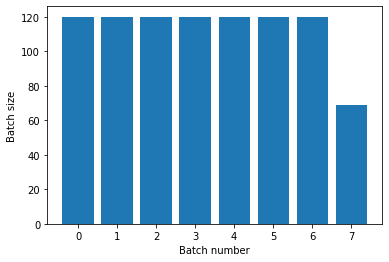

In [21]:
op = dataset.repeat(3).batch(120)
plot_batch_sizes(op)

Tomamos todos los __datos de la fuente__ - los 303 valores -, __extraemos datos en bloques__ de 120. El último bloque tendra 303-120*2 = 63 elementos. Esto lo repetimos tres veces: 

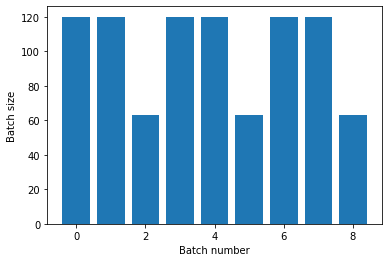

In [22]:
op = dataset.batch(120).repeat(3)
plot_batch_sizes(op)

Similar al caso anterior, solo que vamos a especificar que los bloques que extraigamos tienen que ser completos. No sacaremos menos de 120 datos con cada extracción:

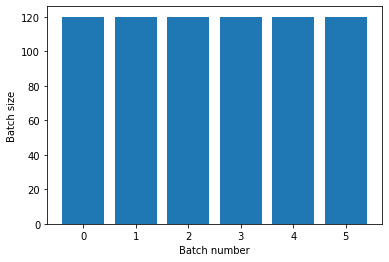

In [23]:
op = dataset.batch(120,drop_remainder=True).repeat(3)
plot_batch_sizes(op)

## padded_batch

Con padded batch vamos a gestionar el caso en el que la shape de todos los elementos no es la misma:

In [24]:
elements = [[1, 2], 
            [3, 4, 5], 
            [6, 7], 
            [8]] 

A = tf.data.Dataset.from_generator(lambda: iter(elements), tf.int32) 

# Aplicamos un pad a cada elemento
B = A.padded_batch(2, padded_shapes=[None]) 

for element in B.as_numpy_iterator(): 
  print(element) 


[[1 2 0]
 [3 4 5]]
[[6 7]
 [8 0]]


Podemos ver como `batch` agrupa los elementos en bloques de dos. La diferencia radica en que hace que la dimensión sea rectangular, completando con ceros - porque no hemos especificado que se usara otro valor.

Para controlar esta funcion tenemos estos parametros: 

- batch_size
- padded_shapes
- padding_values=None
- drop_remainder=False

Con `padded_shapes` podemos definir el factor de forma de los elementos. Con `padding_values` podemos decidir que elemento insertar cuando hacemos el pad. En este ejemplos forzamos a que todos los elementos tengan el mismo tamaño. Veamos que sucede si decimos que el shape sea 3:

In [25]:
# Pad to a fixed size. 
C = A.padded_batch(2, padded_shapes=3) 
for element in C.as_numpy_iterator(): 
  print(element) 

[[1 2 0]
 [3 4 5]]
[[6 7 0]
 [8 0 0]]


Veamos que también podemos rellenar los valores que faltan con otro número diferente de cero. Probamos con -1:

In [26]:
# Pad with a custom value. 
D = A.padded_batch(2, padded_shapes=3, padding_values=-1) 
for element in D.as_numpy_iterator(): 
  print(element) 

[[ 1  2 -1]
 [ 3  4  5]]
[[ 6  7 -1]
 [ 8 -1 -1]]


Cuando trabajemos con duplas - truplas, ... -, podemos también aplicar distintos criterios para cada uno de los elementos de la dupla. Por ejemplo aqui vamos a establecer que el tamaño del primer componente de la dupla sea cuatro, y a rellenar usando -1. Para el segundo componente de la dupla no especificamos el tamaño, y el valor sera 100.

In [27]:
# Components of nested elements can be padded independently. 
elements = [([1, 2, 3], [10]), 
            ([4, 5], [11, 12])] 

E = tf.data.Dataset.from_generator(lambda: iter(elements), (tf.int32, tf.int32)) 

# Pad the first component of the tuple to length 4, and the second 
# component to the smallest size that fits. 
E = E.padded_batch(2, padded_shapes=([4], [None]), padding_values=(-1, 100)) 
list(E.as_numpy_iterator()) 


[(array([[ 1,  2,  3, -1],
         [ 4,  5, -1, -1]]),
  array([[ 10, 100],
         [ 11,  12]]))]

# cache y shuffle

Con Cache los datos que se procesan se mantienen en memoria, y si necesitamos volver a procesarlos, los lambdas no se vuelven a aplicar.

Con Shuffle:

a) creamos un conjunto de elementos de un tamaño especificado  
b) carga el conjunto con los elementos del dataset  
c) extrae aleatoriamente un elemento del conjunto  
d) añade el siguiente elemento del dataset al conjunto  

In [28]:
def doble(x, manipula=True):
    print("ejecuta")
    if manipula:
        return x*2 + round(random.uniform(0,10))
    else:
        return x

In [29]:
doble(3),doble(3)

ejecuta
ejecuta


(9, 13)

- Creamos un conjunto de tres elementos.
- Sacamos aleatoriamente uno de esos tres elementos
- Aplicamos la lambda sober el elemento extraido
- Se incluye en el conjunto el cuarto elemento. Volvemos a tener tres elementos en el conjunto

Cuando hemos sacado los diez elementos repetimos el proceso

Esto significa que 
- el primer valor extraido será en nuestro caso uno de estos: 0, 1, 2
- el segundo valor extraido será en nuestro caso uno de estos: 0, 1, 2, 3
- el tercer valor extraido será en nuestro caso uno de estos: 0, 1, 2, 3, 4
- el cuarto valor extraido será en nuestro caso uno de estos: 0, 1, 2, 3, 4, 5


In [30]:
dataset = tf.data.Dataset.range(10) 
dataset = dataset.shuffle(buffer_size=3).map(lambda x: doble(x, False)).repeat(2)

list(dataset.as_numpy_iterator()) 

ejecuta


[2, 0, 4, 1, 3, 7, 6, 5, 8, 9, 1, 2, 0, 3, 4, 6, 7, 9, 5, 8]

Nos podemos fijar que en las dos repeats el orden con el que se sacan los datos es diferente. Si usamos `Cache` podemos hacer que en la segunda extracción la información sea igual:

In [31]:
dataset = tf.data.Dataset.range(10) 
dataset = dataset.shuffle(buffer_size=3).map(lambda x: doble(x, False)).cache().repeat(2)

list(dataset.as_numpy_iterator())

ejecuta


[2, 0, 4, 1, 6, 3, 7, 8, 5, 9, 2, 0, 4, 1, 6, 3, 7, 8, 5, 9]

Si ponemos el repeat al principio se extraeran dos bloques de 10, y se tratara el dataset de ahí en adelante como si tuvieran 20 items. Por este motivo cache no parece tener efecto:

In [32]:
dataset = tf.data.Dataset.range(10) 
dataset = dataset.repeat(2).shuffle(buffer_size=3).map(lambda x: doble(x)).cache()

list(dataset.as_numpy_iterator())

ejecuta


[11, 7, 15, 9, 13, 19, 17, 21, 25, 23, 7, 11, 15, 9, 17, 21, 23, 19, 13, 25]

Por ultimo indicar que el cache se puede guardar en un archivo. Cuando usamos un archivo conseguimos una propiedad interesante, que __la cache se mantiene entre ejecuciones sucesivas__:

In [33]:
dataset = tf.data.Dataset.range(10) 
dataset = dataset.shuffle(buffer_size=3).map(lambda x: doble(x, False)).cache("./micache").repeat(2)

list(dataset.as_numpy_iterator())

ejecuta


[2, 0, 4, 5, 1, 6, 7, 9, 8, 3, 2, 0, 4, 5, 1, 6, 7, 9, 8, 3]

# concatenate

In [34]:
t1=tf.data.Dataset.from_tensor_slices([1,2,3,4])
t2=tf.data.Dataset.from_tensor_slices([10,20,30,40])

In [35]:
t3=t1.concatenate(t2).map(lambda x:doble(x,False))
list(t3.as_numpy_iterator())

ejecuta


[1, 2, 3, 4, 10, 20, 30, 40]

# enumerate y filter

Es similar al enumerate de Python. Se crea una dupla, con el indice en el primer termino de la dupla, y el valor en el segundo:

In [36]:
dataset1 = tf.data.Dataset.from_tensor_slices(df.values)
dataset1=dataset1.enumerate()
list(dataset1.take(2).as_numpy_iterator())

[(0,
  array([ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
           2.3,   3. ,   0. ,   2. ])),
 (1,
  array([ 67. ,   1. ,   4. , 160. , 286. ,   0. ,   2. , 108. ,   1. ,
           1.5,   2. ,   3. ,   3. ]))]

Con filter podemos aplicar un filtro a los elementos del dataset. Por ejemplo, si lo aplicamos sobre el dataset anterior para sacar las entradas que correspondan a edades mayores de 70:

In [37]:
dataset2=dataset1.filter(lambda x,y:y[0]>70)

In [38]:
list(dataset2.take(4).as_numpy_iterator())

[(110,
  array([ 77.,   1.,   4., 125., 304.,   0.,   2., 162.,   1.,   0.,   1.,
           3.,   3.])),
 (180,
  array([7.40e+01, 0.00e+00, 2.00e+00, 1.20e+02, 2.69e+02, 0.00e+00,
         2.00e+00, 1.21e+02, 1.00e+00, 2.00e-01, 1.00e+00, 1.00e+00,
         3.00e+00])),
 (204,
  array([ 76. ,   0. ,   3. , 140. , 197. ,   0. ,   1. , 116. ,   0. ,
           1.1,   2. ,   0. ,   3. ])),
 (219,
  array([ 71. ,   0. ,   4. , 112. , 149. ,   0. ,   0. , 125. ,   0. ,
           1.6,   2. ,   0. ,   3. ]))]

# flat_map

Podemos tomar un dataset y crear otro. En este ejemplo tomamos un dataset que toma una matriz de entrada, para tratar los componentes como escalares

In [39]:
dataset = tf.data.Dataset.from_tensor_slices([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
dataset = dataset.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(x)) 
list(dataset.as_numpy_iterator()) 

[1, 2, 3, 4, 5, 6, 7, 8, 9]

Para ver la diferencia con map, podemo ver en primer lugar que map no retorna un dataset como si hace flat_map. Esto significa que con map tratamos cada elemento de entrada y producimos un elemento de salida. En el caso de flatmap la estructura del dataset es completamente diferente:

In [40]:
dataset = tf.data.Dataset.from_tensor_slices([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
dataset = dataset.map(lambda x: x) 
list(dataset.as_numpy_iterator()) 

[array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]

# interleave y prefetch

In [41]:
t1=tf.data.Dataset.from_tensor_slices([1,2,3,4])
t2=tf.data.Dataset.from_tensor_slices([[1,2,3,4],[10,20,30,40]])
t3=tf.data.Dataset.from_tensor_slices(([1,2,3,4],[10,20,30,40]))   

In [42]:
tf6=t1.interleave(lambda x: tf.data.Dataset.from_tensors(x+8))

In [43]:
tf7= tf.data.Dataset.range(3) 
tf7 = tf7.prefetch(2) 
list(tf7.as_numpy_iterator()) 

[0, 1, 2]

# reduce

In [44]:
tf.data.Dataset.range(5).reduce(np.int64(0), lambda x, _: x + 1).numpy()

5

In [45]:
tf.data.Dataset.range(5).reduce(np.int64(0), lambda x, y: x + y).numpy()

10

# Shard

Este funcion es util para implementar entrenamiento distribuido:

In [46]:
A = tf.data.Dataset.range(10)

In [47]:
B = A.shard(num_shards=3, index=0) 
list(B.as_numpy_iterator()) 

[0, 3, 6, 9]

In [48]:
C = A.shard(num_shards=3, index=1) 
list(C.as_numpy_iterator())

[1, 4, 7]

In [49]:
D = A.shard(num_shards=3, index=2) 
list(D.as_numpy_iterator())

[2, 5, 8]

# skip

Nos permite saltarnos elementos de un dataset

In [50]:
A = tf.data.Dataset.range(10) 
A = A.skip(7) 
list(A.as_numpy_iterator()) 

[7, 8, 9]

# window

Toma un dataset y los transforma agrupando los datos en bloques, windows. El compartamiento de esta función se modela con los siguientes argumentos:

- size. Tamaño de cada elemento
- shift=None. Con esto definimos como moveremos la ventana con cada registro que procesamos. Por defecto lo que hará es desplazarse por la misma cantidad que size.
- stride=1. El stride con que procesaremos los registros
- drop_remainder=False

Con `size` indicamos el tamaño de cada elemento. En este ejemplo todos los elementos se crean de tamaño dos. No hay padding, ni shift - el shift será entonces dos: 

In [51]:
dataset = tf.data.Dataset.range(11).window(2) 
for window in dataset: 
  print(list(window.as_numpy_iterator())) 

[0, 1]
[2, 3]
[4, 5]
[6, 7]
[8, 9]
[10]


En este ejemplo vamos a definir el tamaño como tres. Como shift es dos, tomaremos 3 datos para crear cada elemento, y se desplaza dos. Esto significa que el último componente y el primero de cada elemento son el mismo:

In [52]:
dataset = tf.data.Dataset.range(11).window(3, 2, 1, True) 
for window in dataset: 
  print(list(window.as_numpy_iterator())) 

[0, 1, 2]
[2, 3, 4]
[4, 5, 6]
[6, 7, 8]
[8, 9, 10]


En este otro ejemplo el shift es 1. Esto significa que tomaria 0, 1, 2 para luego tomar 1, 2, 3, 

In [53]:
dataset = tf.data.Dataset.range(11).window(3, 1, 1, True) 
for window in dataset: 
  print(list(window.as_numpy_iterator())) 

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 8]
[7, 8, 9]
[8, 9, 10]


En este ejemplo usamos un shift de tres, pero con un stride de dos. Con el shift de 3, el primer elemento sería 0, 1, 2 y el segundo elemento 3, 4, 5

Como el añadimos un stride de 2 el primer elemento pasa a ser 0, 2, 4, y el segundo elemento pasaría a ser 3, 5, 7

Esto es, el stride nos dice como nos desplezamos de un elemento a otro. Shift nos dice cual es el primer elemento del siguente bloque:

In [54]:
dataset = tf.data.Dataset.range(11).window(3, 3, 2, True) 
for window in dataset: 
  print(list(window.as_numpy_iterator())) 

[0, 2, 4]
[3, 5, 7]
[6, 8, 10]


Viendo el shift de 1, primer elemento sería 0, 1, 2, el segundo 1, 2, 3, y el tercero 2, 3, 4

Con el stride de 2 pasaría a ser primer elemento sería 0, 2, 4, el segundo 1, 3, 5, y el tercero 2, 4, 6

In [55]:
dataset = tf.data.Dataset.range(7).window(3, 1, 2, True) 
for window in dataset: 
  print(list(window.as_numpy_iterator())) 

[0, 2, 4]
[1, 3, 5]
[2, 4, 6]


# zip

In [56]:
# The nested structure of the `datasets` argument determines the 
# structure of elements in the resulting dataset. 
a = tf.data.Dataset.range(1, 4)  # ==> [ 1, 2, 3 ] 
b = tf.data.Dataset.range(4, 7)  # ==> [ 4, 5, 6 ] 

ds = tf.data.Dataset.zip((a, b)) 
list(ds.as_numpy_iterator()) 

[(1, 4), (2, 5), (3, 6)]